<a href="https://colab.research.google.com/github/RubenMcCarty/Master-BigData-DataScience/blob/main/2_Big_Data_Spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Acciones sobre un RDD en Spark**



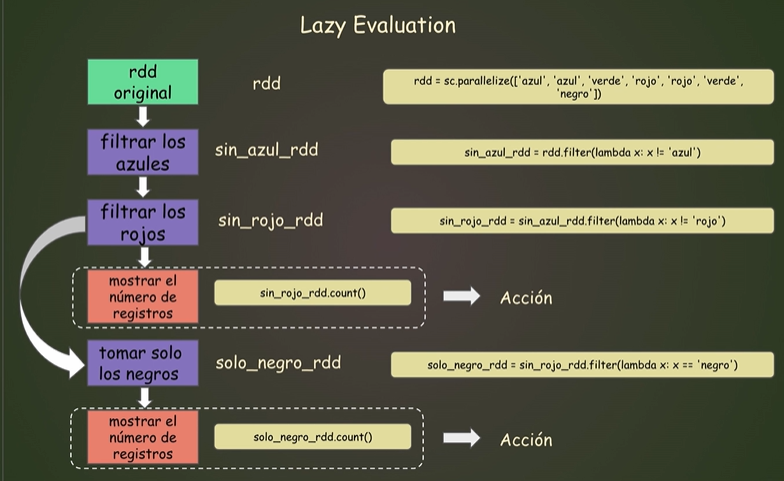

## Tipos de acciones
 * Driver
 * Distributed


# Acciones: función reduce

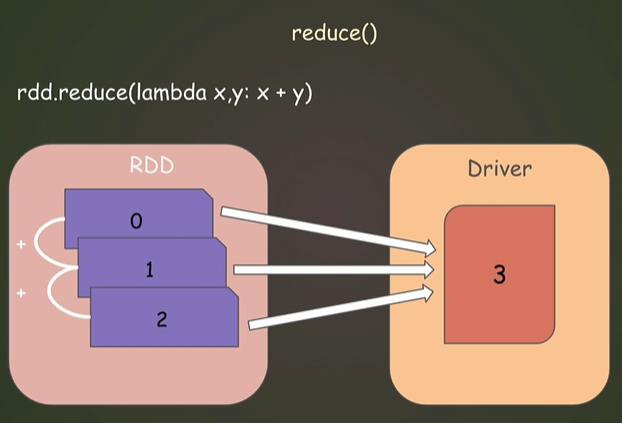

In [69]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

In [70]:

rdd = sc.parallelize([2,4,6,8])

In [71]:

rdd.reduce(lambda x,y: x + y)

20

In [72]:
rdd1 = sc.parallelize([1,2,3,4])
rdd1.reduce(lambda x,y: x * y)

24

# Acciones: función count

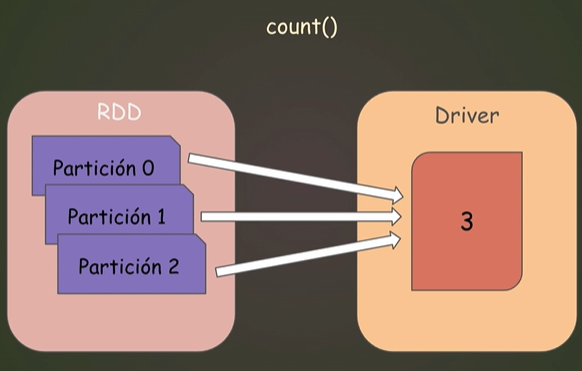

In [73]:

import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

In [74]:
rdd = sc.parallelize(['j', 'o', 's', 'e'])
rdd.count()

4

In [75]:
rdd1 = sc.parallelize([item for item in range(10)])

rdd1.count()

10

# Acciones: función collect

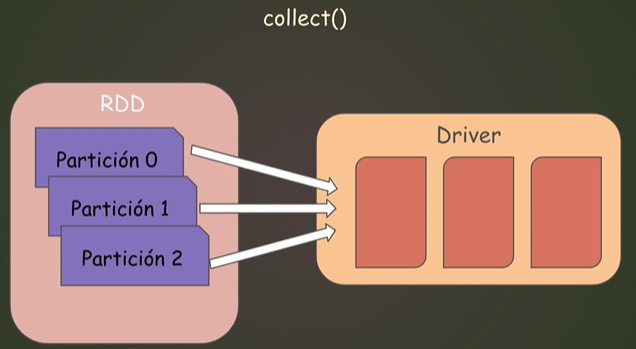

In [76]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

In [77]:

rdd = sc.parallelize('Hola Apache Spark!'.split(' '))

rdd.collect()

['Hola', 'Apache', 'Spark!']

In [78]:
rdd1 = sc.parallelize([(item, item ** 2) for item in range(20)])
rdd1.collect()

[(0, 0),
 (1, 1),
 (2, 4),
 (3, 9),
 (4, 16),
 (5, 25),
 (6, 36),
 (7, 49),
 (8, 64),
 (9, 81),
 (10, 100),
 (11, 121),
 (12, 144),
 (13, 169),
 (14, 196),
 (15, 225),
 (16, 256),
 (17, 289),
 (18, 324),
 (19, 361)]

# Acciones: funciones take, max y saveAsTextFile

In [79]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

In [81]:
# take

rdd = sc.parallelize('La programación es bella'.split(' '))

rdd.take(2)


['La', 'programación']

In [82]:

rdd.take(4)

['La', 'programación', 'es', 'bella']

In [83]:
rdd.take(3)

['La', 'programación', 'es']

In [84]:
# max

rdd1 = sc.parallelize([item/(item + 1) for item in range(10)])

rdd1.max()

0.9

In [85]:
rdd1.collect()

[0.0,
 0.5,
 0.6666666666666666,
 0.75,
 0.8,
 0.8333333333333334,
 0.8571428571428571,
 0.875,
 0.8888888888888888,
 0.9]

In [86]:
# saveAsTextFile

rdd.collect()

['La', 'programación', 'es', 'bella']

In [87]:
rdd.saveAsTextFile('./rdd')

In [90]:
# para guardad en un solo fichero
rdd.coalesce(1).saveAsTextFile('./rdd2')

# Aspectos avanzados sobre RDD

## Almacenamiento en caché
El almacenamiento en caché permite que spark conserve los datos en todos los calculos y operaciones.

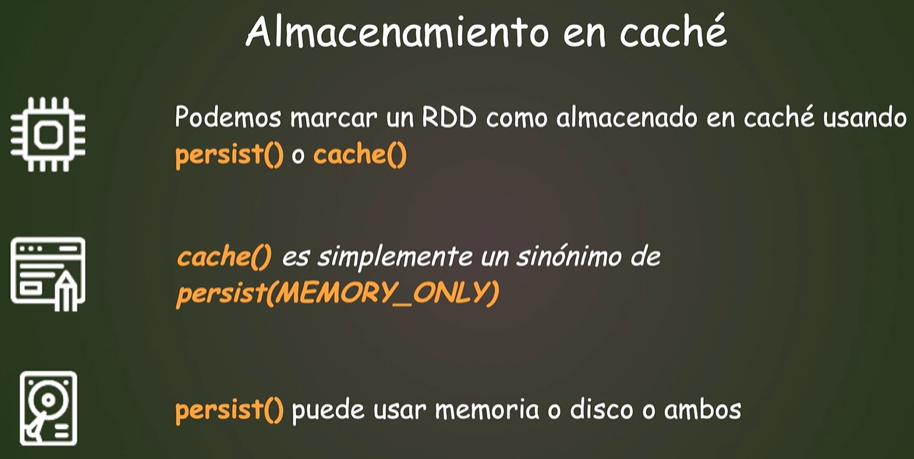

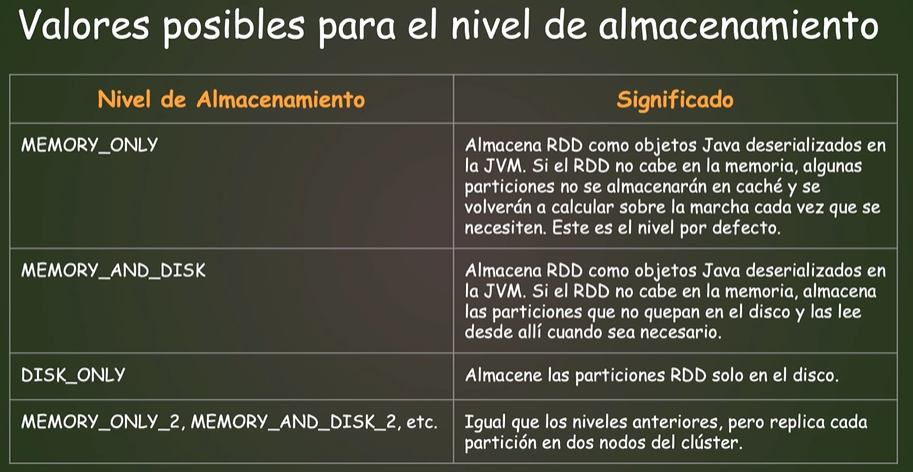

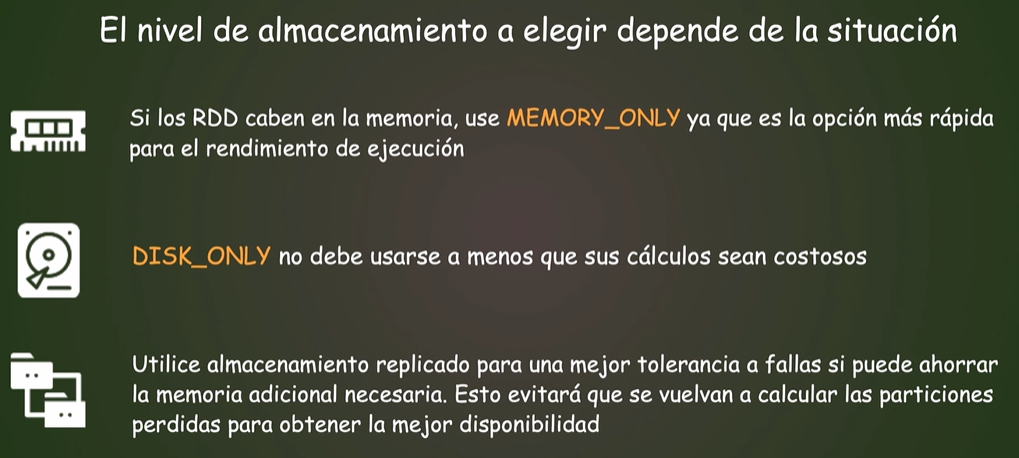

In [91]:
# Almacenamiento en caché

import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

In [92]:
rdd = sc.parallelize([item for item in range(10)])

In [93]:
from pyspark.storagelevel import StorageLevel

In [95]:
rdd.persist(StorageLevel.MEMORY_ONLY)

ParallelCollectionRDD[98] at readRDDFromFile at PythonRDD.scala:274

In [96]:
rdd.unpersist()

ParallelCollectionRDD[98] at readRDDFromFile at PythonRDD.scala:274

In [97]:
rdd.persist(StorageLevel.DISK_ONLY)

ParallelCollectionRDD[98] at readRDDFromFile at PythonRDD.scala:274

In [98]:
rdd.unpersist()
rdd.cache()

ParallelCollectionRDD[98] at readRDDFromFile at PythonRDD.scala:274

# Particionado

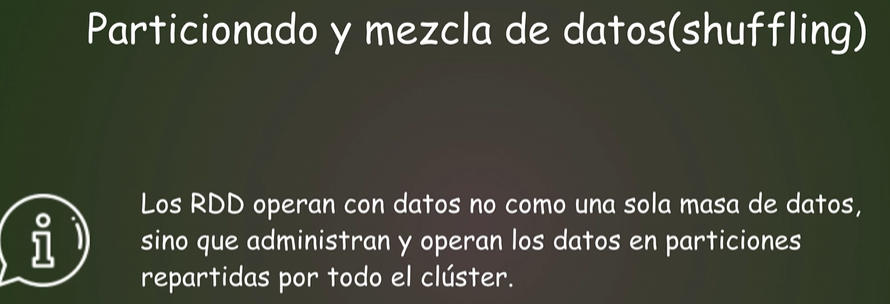

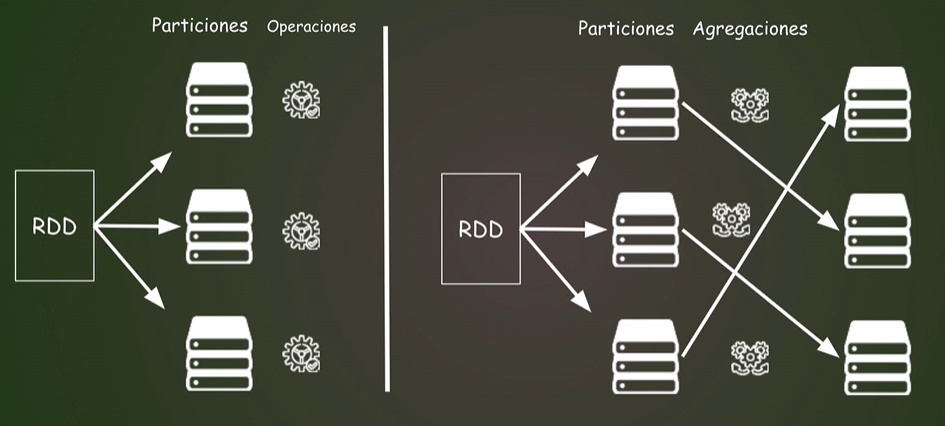

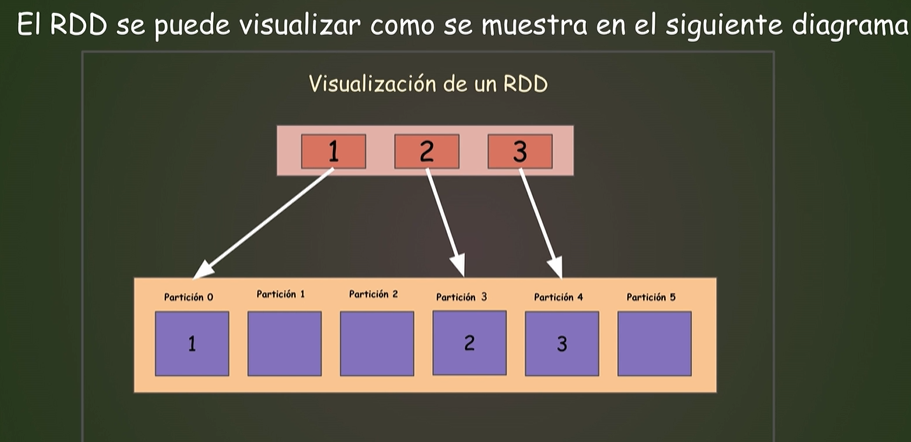

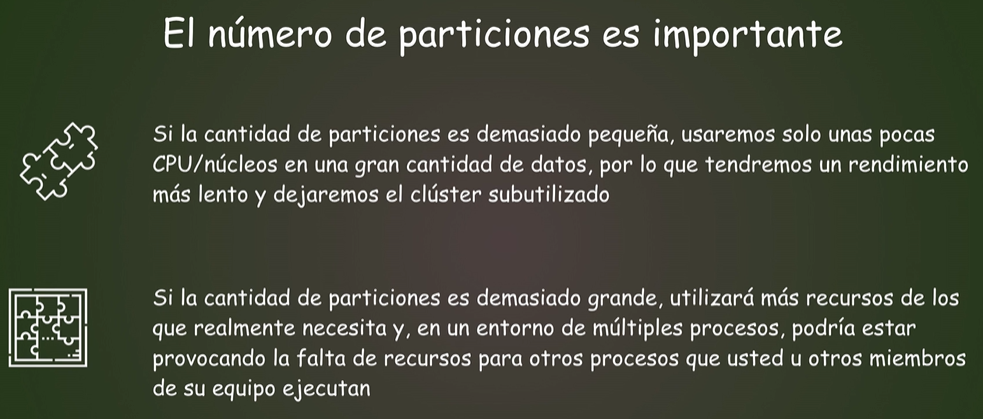

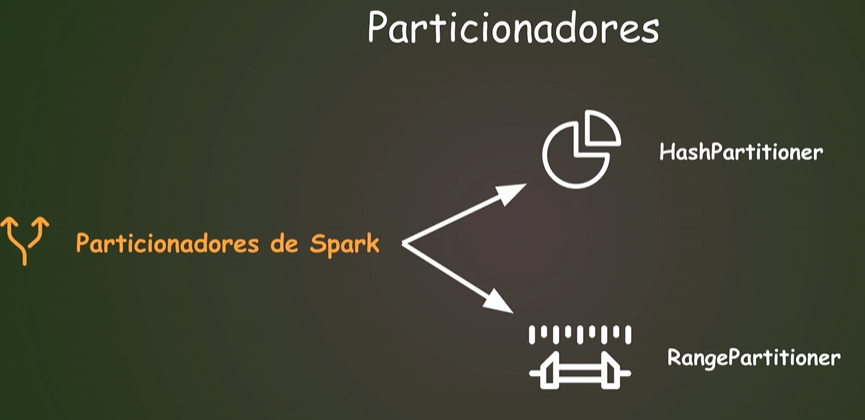

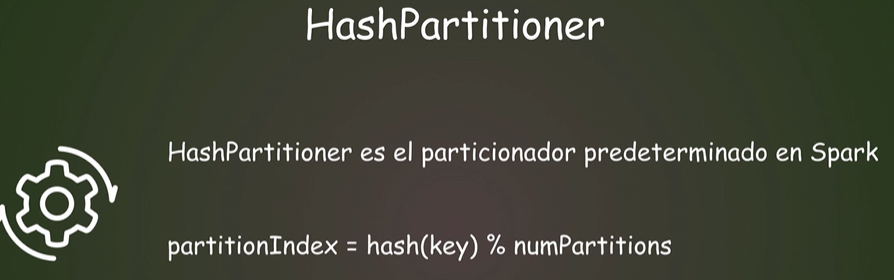

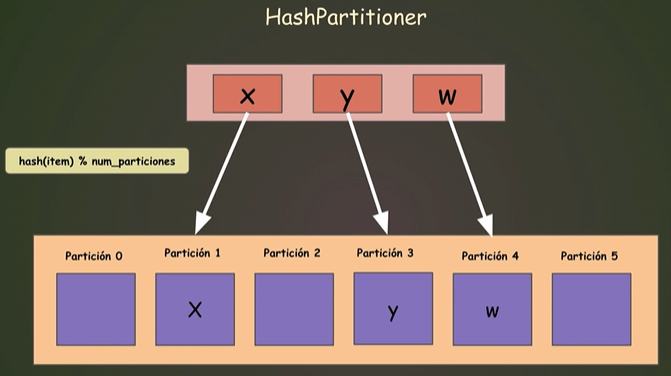

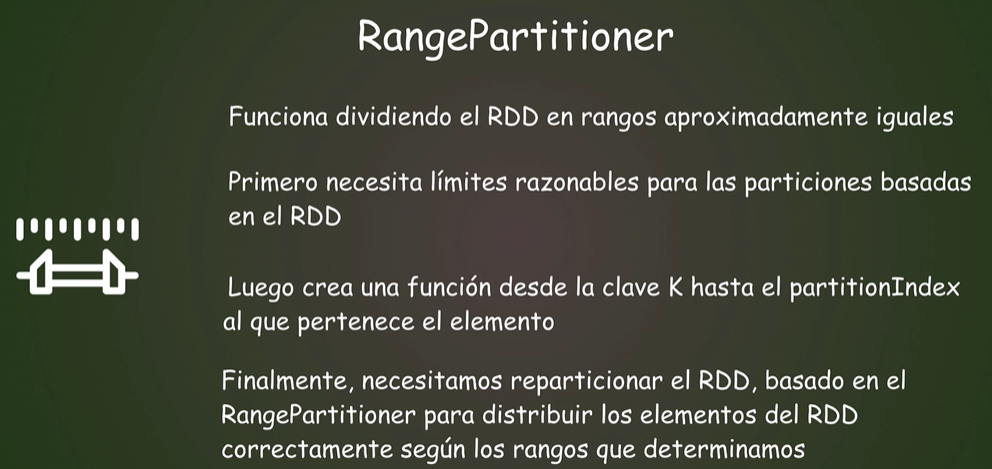

In [99]:
# HashPartitioner

import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

In [100]:

rdd = sc.parallelize(['x', 'y', 'z'])

In [101]:
hola = 'Hola'



In [102]:
hash(hola)

-6849017702304789200

In [103]:
num_particiones = 6

In [105]:
# indice = hash(item) % num_particiones

hash('x') % num_particiones

3

In [106]:

hash('y') % num_particiones

5

In [107]:
hash('z') % num_particiones

3

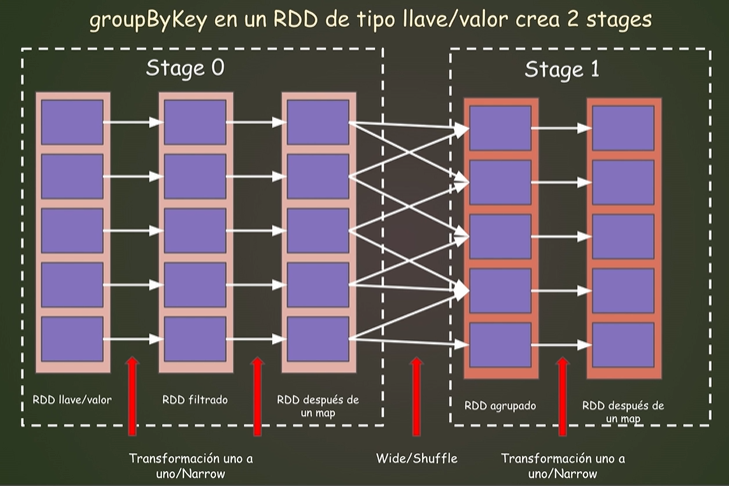

# Broadcast variables

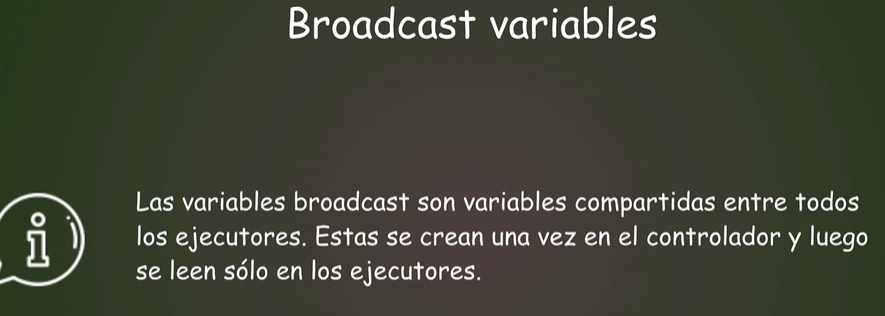

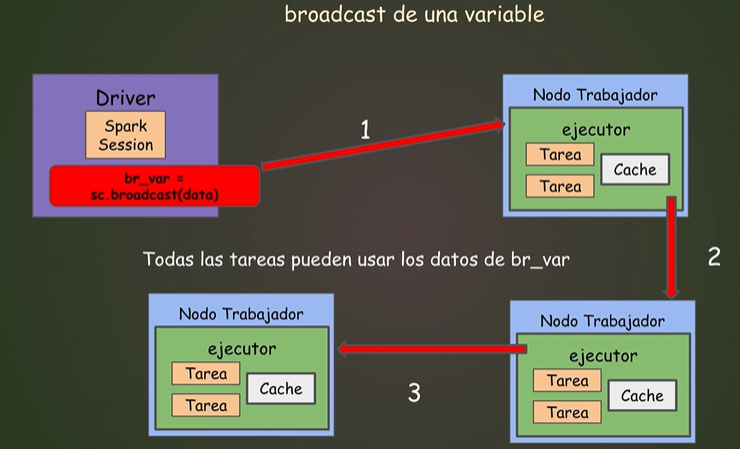

In [108]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

In [109]:

rdd = sc.parallelize([item for item in range(10)])

In [110]:
uno = 1

In [111]:

br_uno = sc.broadcast(uno)

In [112]:
rdd1 = rdd.map(lambda x: x + br_uno.value)

rdd1.collect()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [113]:
br_uno.unpersist()

In [114]:

rdd1  = rdd.map(lambda x: x + br_uno.value)

In [115]:

rdd1.collect()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [116]:
br_uno.destroy()

rdd1  = rdd.map(lambda x: x + br_uno.value)

In [117]:
rdd1.take(5)

Py4JJavaError: ignored

# Acumuladores

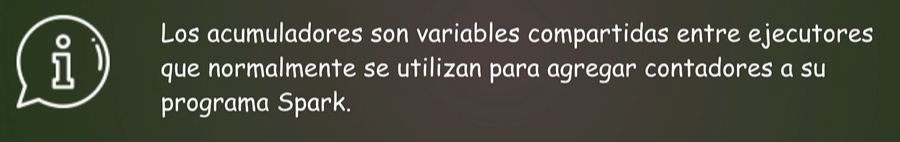

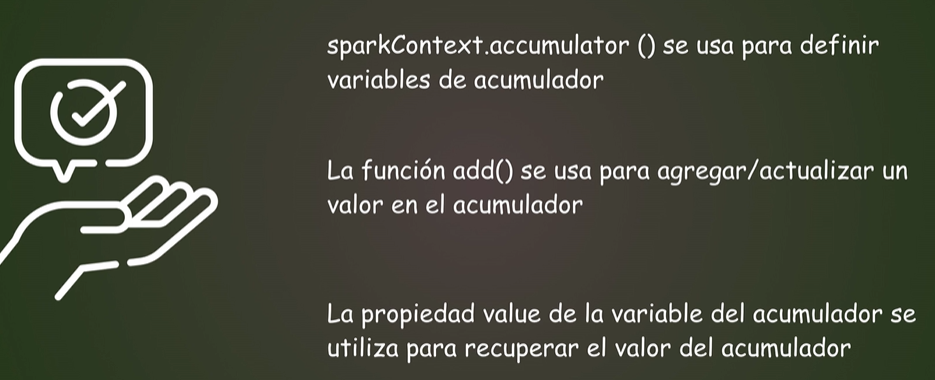

In [118]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

In [119]:

acumulador = sc.accumulator(0)

In [120]:
rdd = sc.parallelize([2,4,6,8,10])

In [121]:

rdd.foreach(lambda x: acumulador.add(x))

In [122]:
print(acumulador.value)

30


In [123]:
rdd1 = sc.parallelize('Mi nombre es Jose Miguel y me siento genial'.split(' '))

In [125]:
acumulador1 = sc.accumulator(0)

In [126]:
rdd1.foreach(lambda x: acumulador1.add(1))

print(acumulador1.value)

9
